In [54]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.notebook_repr_html', True)

In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# concatenating both datasets
df = pd.concat([train, test])
df.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [56]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [57]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [58]:
print(train.shape, test.shape, df.shape)

(7920, 3) (1953, 2) (9873, 3)


In [59]:
df.describe()

,id,label
count,9873.000000,7920.000000
mean,4937.000000,0.255808
std,2850.233938,0.436342
min,1.000000,0.000000
25%,2469.000000,0.000000
50%,4937.000000,0.000000
75%,7405.000000,1.000000
max,9873.000000,1.000000


In [60]:
df.dtypes

id         int64
label    float64
tweet     object
dtype: object

In [61]:
df.isnull().sum()

id          0
label    1953
tweet       0
dtype: int64

In [62]:
df['label'].value_counts()

0.0    5894
1.0    2026
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

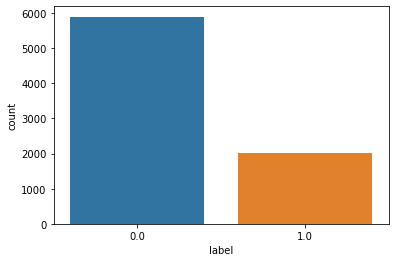

In [63]:
sns.countplot(x='label', data=df)

In [64]:
def clean_text(text):
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    text = re.sub('http[s]?://\S+', '', text)
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    #Remove Unicode characters
    #It matches any character which is not contained in the ASCII character set (0-127, i.e. 0x0 to 0x7F).
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    #Convert to lowercase to maintain consistency
    text = text.lower()
    #remove double spaces
    text = re.sub('\s+', ' ',text)
    return text
df["clean_tweet"] = df.tweet.apply(lambda x: clean_text(x))

In [65]:
#defining stop words
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all','also', 'am', 'an', 'and',

'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been','before', 'being', 'below',

'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com','could', "couldn't", 'did',

"didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down','during', 'each', 'else', 'ever',

'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has',"hasn't", 'have', "haven't", 'having',

'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers','herself', 'him', 'himself', 'his', 'how',

"how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've",'if', 'in', 'into', 'is', "isn't", 'it',

"it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me','more', 'most', "mustn't", 'my', 'myself',

'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or','other', 'otherwise', 'ought', 'our', 'ours','ourselves', 'out', 'over', 'own', 'r', 'same', 'shall',"shan't", 'she', "she'd", "she'll", "she's",

'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',

'them', 'themselves', 'then', 'there', "there's", 'these','they', "they'd", "they'll", "they're",

"they've", 'this', 'those', 'through', 'to', 'too', 'under','until', 'up', 'very', 'was', "wasn't",

'we', "we'd", "we'll", "we're", "we've", 'were', "weren't",'what', "what's", 'when', "when's", 'where',

"where's", 'which', 'while', 'who', "who's", 'whom', 'why',"why's", 'with', "won't", 'would', "wouldn't",

'www', 'you', "you'd", "you'll", "you're", "you've", 'your','yours', 'yourself', 'yourselves']

In [66]:
# Remove stopwords from all the tweets
df['cleaned_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))

In [67]:
df.head()

,id,label,tweet,clean_tweet,cleaned_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beaut...,fingerprint pregnancy test android apps beauti...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love go talk makememories unplug relax iphone ...
3,4,0.0,I'm wired I know I'm George I was made that wa...,i'm wired i know i'm george i was made that wa...,wired know george made way iphone cute daventr...
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple won't even talk to ...,amazing service apple even talk question unles...


In [68]:
df['word_count']=df.cleaned_tweet.str.split().apply(lambda x: len(x))

In [69]:
df.head()

,id,label,tweet,clean_tweet,cleaned_tweet,word_count
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beaut...,fingerprint pregnancy test android apps beauti...,12
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...,11
2,3,0.0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love go talk makememories unplug relax iphone ...,10
3,4,0.0,I'm wired I know I'm George I was made that wa...,i'm wired i know i'm george i was made that wa...,wired know george made way iphone cute daventr...,9
4,5,1.0,What amazing service! Apple won't even talk to...,what amazing service apple won't even talk to ...,amazing service apple even talk question unles...,10


In [70]:
ndf=df.copy()
ndf = ndf.drop(['tweet','clean_tweet','word_count'], axis = 1)

In [71]:
ndf.head()

,id,label,cleaned_tweet
0,1,0.0,fingerprint pregnancy test android apps beauti...
1,2,0.0,finally transparant silicon case thanks uncle ...
2,3,0.0,love go talk makememories unplug relax iphone ...
3,4,0.0,wired know george made way iphone cute daventr...
4,5,1.0,amazing service apple even talk question unles...


In [72]:
# Seperating Train and Test Set
train_set = ndf[~ndf.label.isnull()]
test_set = ndf[ndf.label.isnull()]
# Shape
print(train_set.shape,test_set.shape)

(7920, 3) (1953, 3)


In [73]:
# Defining X and Y
X = train_set.drop(['label'], axis=1)
y = train_set.label
# Droping target columns
test_set = test_set.drop(['label'], axis=1)
X=X['cleaned_tweet'].astype(str)
#Train test Split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state =3)

In [75]:
X_train

1901    loving new premium suite software upgrade feat...
478             yeah ios soon apple pic twitter zfxqo v l
839       broke second ipod year happy make screens crack
3261        ios completly buggered phone ios problems ios
3422    happy boyfriend smile couple wonderful insta c...
                              ...                        
7096    b ruff back back via hiphop newartist newmusic...
1667    gain followers rt must follow follow back foll...
3321    f u apple shipping enough iphone s trying one ...
1688    hey guys look nokia sirocco gold phone origina...
5994    love rt f ck need u instagram iphone iphone s ...
Name: cleaned_tweet, Length: 5544, dtype: object

In [76]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5544,) (2376,) (5544,) (2376,)


In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [78]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_dtm,y_train)
rf = model.predict(X_test_dtm)
print("Accuracy:",accuracy_score(y_test,rf)*100,"%")

Accuracy: 86.23737373737373 %


In [79]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf)
cnf_matrix = cnf_matrix / cnf_matrix.astype(float).sum(axis=1)
class_names = ['Not Negative', 'Negative']

# Plot normalized confusion matrix
print(cnf_matrix)

# Compute classification report
eval_metrics = classification_report(y_test, rf, target_names=class_names)
print(eval_metrics)


[[0.95014164 0.14402619]
 [0.13541076 0.60883797]]
              precision    recall  f1-score   support

Not Negative       0.88      0.95      0.91      1765
    Negative       0.81      0.61      0.69       611

    accuracy                           0.86      2376
   macro avg       0.84      0.78      0.80      2376
weighted avg       0.86      0.86      0.86      2376

